<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/feathers224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path='/content/drive/My Drive/B1-Msc experiment/'   
Dataset=[
'feathers224'        
]
Results=pd.DataFrame([])
Results1=pd.DataFrame([])
Results2=pd.DataFrame([])
Results3=pd.DataFrame([])
Results4=pd.DataFrame([])
Results5=pd.DataFrame([])
Results6=pd.DataFrame([])

Using TensorFlow backend.


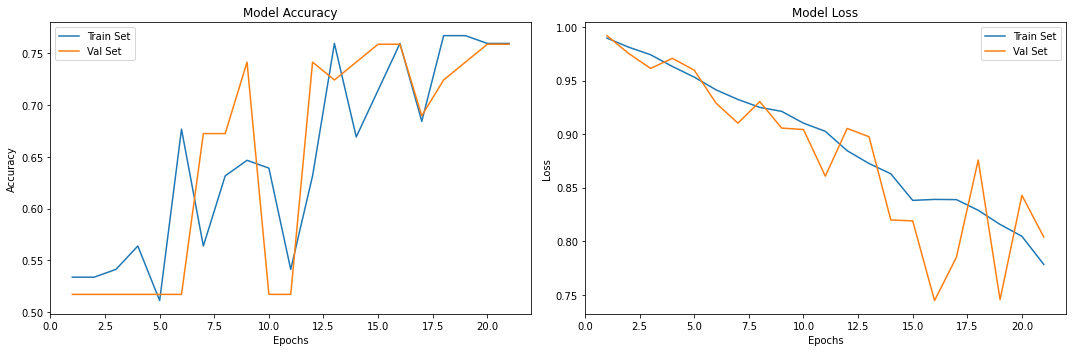

Train: 0.526, Test: 0.517


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.0,0.517241,0.517241,0.258621,0.267539,No Aug,feathers224,75.862068,75.939852
recall,0.0,1.000000,0.517241,0.500000,0.517241,No Aug,feathers224,75.862068,75.939852
f1-score,0.0,0.681818,0.517241,0.340909,0.352665,No Aug,feathers224,75.862068,75.939852
support,28.0,30.000000,0.517241,58.000000,58.000000,No Aug,feathers224,75.862068,75.939852


In [3]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results=Results.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results)
keras.backend.clear_session()


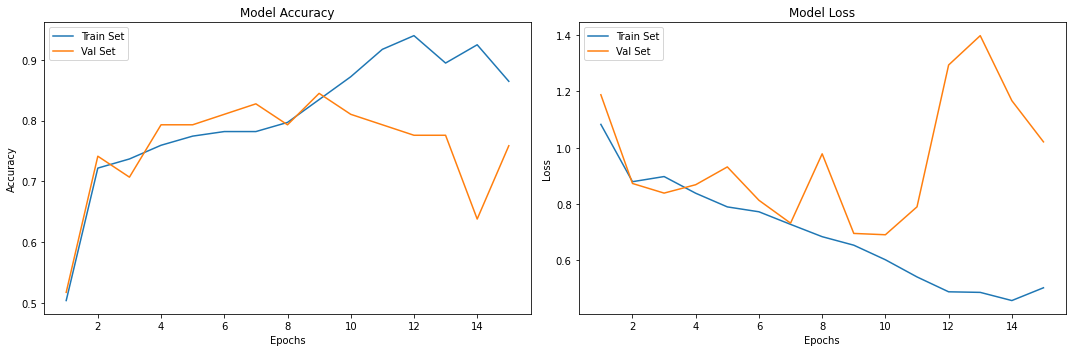

Train: 0.985, Test: 0.759


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.818182,0.722222,0.758621,0.770202,0.768548,HorizontalFlip,feathers224,75.862068,86.466163
recall,0.642857,0.866667,0.758621,0.754762,0.758621,HorizontalFlip,feathers224,75.862068,86.466163
f1-score,0.720000,0.787879,0.758621,0.753939,0.755110,HorizontalFlip,feathers224,75.862068,86.466163
support,28.000000,30.000000,0.758621,58.000000,58.000000,HorizontalFlip,feathers224,75.862068,86.466163


In [4]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results1=Results1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results1)
keras.backend.clear_session()


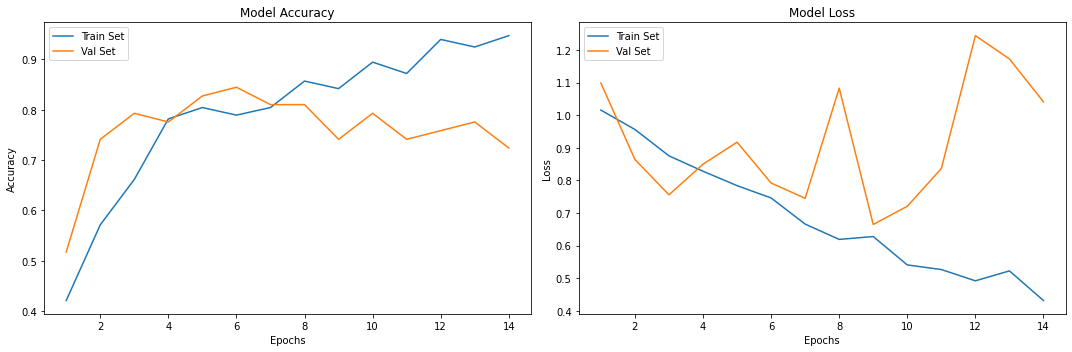

Train: 0.977, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,dataset,val acc,acc
precision,0.720000,0.696970,0.706897,0.708485,0.708088,Shear224,72.41379,94.736844
recall,0.642857,0.766667,0.706897,0.704762,0.706897,Shear224,72.41379,94.736844
f1-score,0.679245,0.730159,0.706897,0.704702,0.705580,Shear224,72.41379,94.736844
support,28.000000,30.000000,0.706897,58.000000,58.000000,Shear224,72.41379,94.736844


In [5]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['dataset']=['Shear224','Shear224','Shear224','Shear224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results2=Results2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results2)
keras.backend.clear_session()


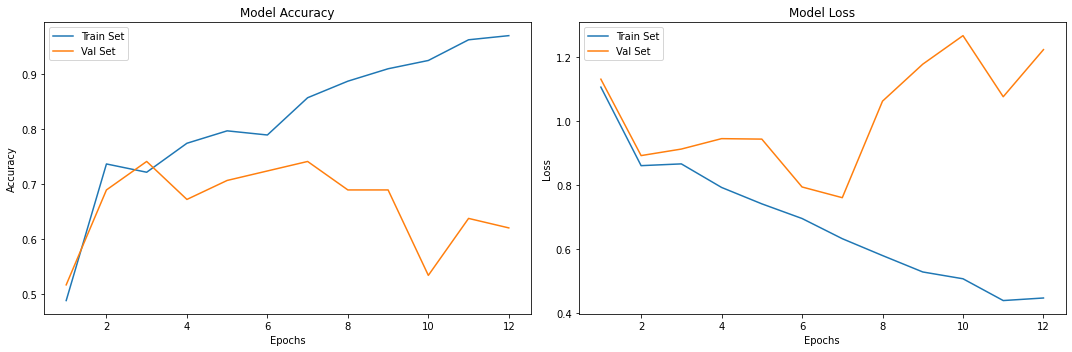

Train: 0.985, Test: 0.707


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.720000,0.696970,0.706897,0.708485,0.708088,Rotate,feathers224,62.068963,96.992481
recall,0.642857,0.766667,0.706897,0.704762,0.706897,Rotate,feathers224,62.068963,96.992481
f1-score,0.679245,0.730159,0.706897,0.704702,0.705580,Rotate,feathers224,62.068963,96.992481
support,28.000000,30.000000,0.706897,58.000000,58.000000,Rotate,feathers224,62.068963,96.992481


In [6]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results3=Results3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results3)
keras.backend.clear_session()


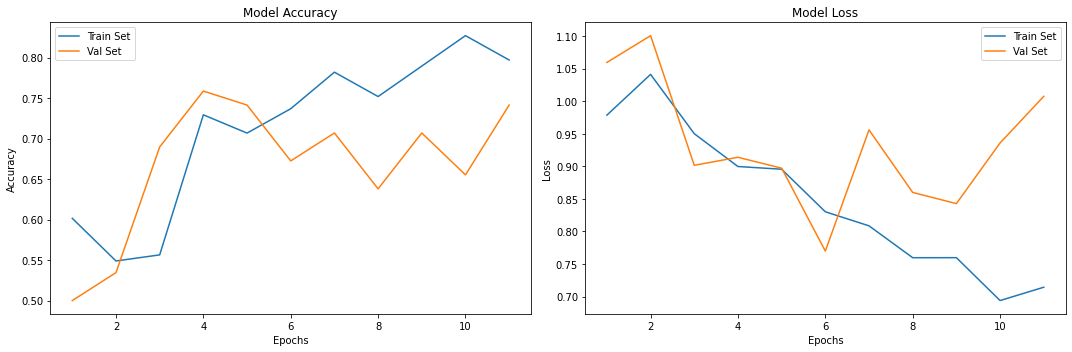

Train: 0.835, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.941176,0.707317,0.775862,0.824247,0.820215,Shear,feathers224,74.137932,79.699248
recall,0.571429,0.966667,0.775862,0.769048,0.775862,Shear,feathers224,74.137932,79.699248
f1-score,0.711111,0.816901,0.775862,0.764006,0.765830,Shear,feathers224,74.137932,79.699248
support,28.000000,30.000000,0.775862,58.000000,58.000000,Shear,feathers224,74.137932,79.699248


In [7]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results4=Results4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results4)
keras.backend.clear_session()


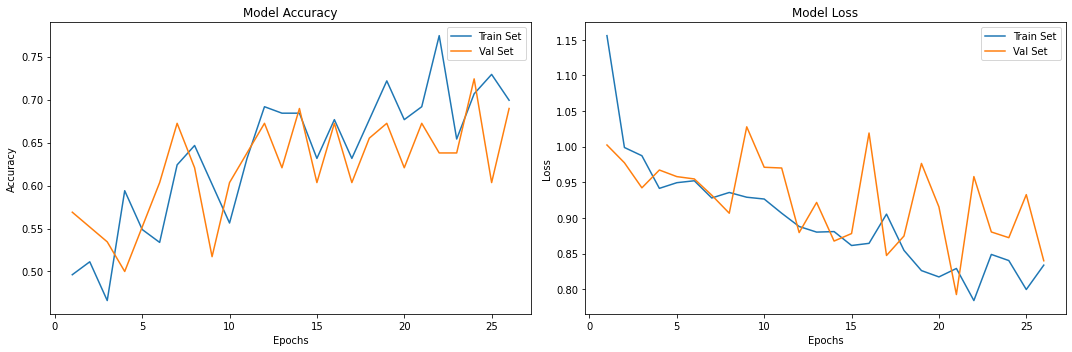

Train: 0.722, Test: 0.672


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.846154,0.622222,0.672414,0.734188,0.730327,Width,feathers224,68.965518,69.924814
recall,0.392857,0.933333,0.672414,0.663095,0.672414,Width,feathers224,68.965518,69.924814
f1-score,0.536585,0.746667,0.672414,0.641626,0.645248,Width,feathers224,68.965518,69.924814
support,28.000000,30.000000,0.672414,58.000000,58.000000,Width,feathers224,68.965518,69.924814


In [8]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results5=Results5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results5)
keras.backend.clear_session()


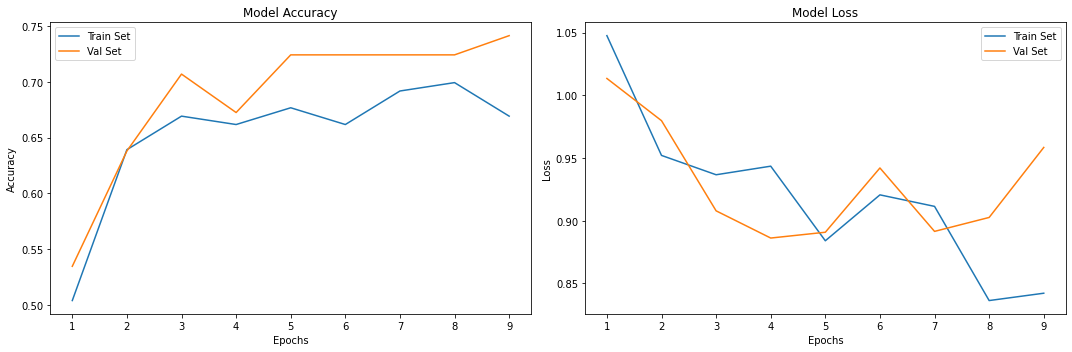

Train: 0.744, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.941176,0.707317,0.775862,0.824247,0.820215,height,feathers224,74.137932,66.917294
recall,0.571429,0.966667,0.775862,0.769048,0.775862,height,feathers224,74.137932,66.917294
f1-score,0.711111,0.816901,0.775862,0.764006,0.765830,height,feathers224,74.137932,66.917294
support,28.000000,30.000000,0.775862,58.000000,58.000000,height,feathers224,74.137932,66.917294


In [9]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['feathers224','feathers224','feathers224','feathers224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results6=Results6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


In [10]:
Final=pd.DataFrame([])
Final=Final.append(Results)
Final=Final.append(Results1)
Final=Final.append(Results2)
Final=Final.append(Results3)
Final=Final.append(Results4)
Final=Final.append(Results5)
Final=Final.append(Results6)

pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Final)

,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.000000,0.517241,0.517241,0.258621,0.267539,No Aug,feathers224,75.862068,75.939852
recall,0.000000,1.000000,0.517241,0.500000,0.517241,No Aug,feathers224,75.862068,75.939852
f1-score,0.000000,0.681818,0.517241,0.340909,0.352665,No Aug,feathers224,75.862068,75.939852
support,28.000000,30.000000,0.517241,58.000000,58.000000,No Aug,feathers224,75.862068,75.939852
precision,0.818182,0.722222,0.758621,0.770202,0.768548,HorizontalFlip,feathers224,75.862068,86.466163
recall,0.642857,0.866667,0.758621,0.754762,0.758621,HorizontalFlip,feathers224,75.862068,86.466163
f1-score,0.720000,0.787879,0.758621,0.753939,0.755110,HorizontalFlip,feathers224,75.862068,86.466163
support,28.000000,30.000000,0.758621,58.000000,58.000000,HorizontalFlip,feathers224,75.862068,86.466163
precision,0.720000,0.696970,0.706897,0.708485,0.708088,NaN,Shear224,72.413790,94.736844
recall,0.642857,0.766667,0.706897,0.704762,0.706897,NaN,Shear224,72.413790,94.736844
